# Tools & Agent (도구와 에이전트)

## Tools (도구)

도구(Tools) 는 에이전트가 특정 행동을 수행하기 위해 호출하는 구성 요소입니다.  
이들은 모델이 명확히 정의된 입력과 출력을 통해 외부 세계와 상호작용할 수 있도록 하여 모델의 기능을 확장합니다.

도구는 호출 가능한 함수(callable function) 와 그에 대한 입력 스키마(input schema) 를 캡슐화합니다.
이러한 도구들은 호환되는 채팅 모델(chat model) 에 전달될 수 있으며, 모델은 도구를 언제, 어떤 인수(argument) 로 호출할지 스스로 결정할 수 있습니다.

## Agent (에이전트)

에이전트(Agents)는 언어 모델과 도구를 결합하여 작업에 대해 추론하고, 사용할 도구를 결정하며, 솔루션을 향해 반복적으로 작업할 수 있는 시스템을 만듭니다. `create_agent`는 프로덕션에 바로 사용 가능한 에이전트 구현을 제공합니다. LLM 에이전트는 목표를 달성하기 위해 도구를 반복적으로 실행합니다.

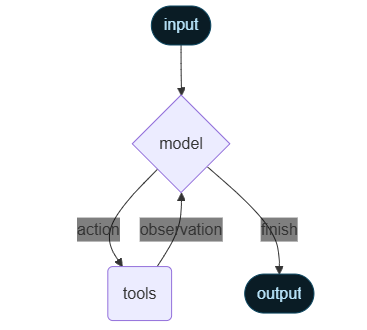

### LLM 연결


In [ ]:
# model = init_chat_model("gpt-5-nano", model_provider="openai")

## 도구 정의 

가장 간단하게 도구를 만드는 방법은 `@tool` 데코레이터를 사용하는 것입니다.  

**Type hints** 는 필수입니다. 이들은 도구의 **입력 스키마(input schema)** 를 정의하기 때문입니다.  
**독스트링(docstring)** 은 모델이 도구의 목적을 이해할 수 있도록 **간결하면서도 유용한 정보**를 포함해야 합니다.


In [ ]:
def search_db(query: str, limit: int = 10) -> str:

### 도구 속성 사용자 정의

기본적으로 도구의 이름은 **함수 이름**에서 가져옵니다.  
더 설명적인 이름이 필요할 경우에는 이를 **재정의(override)** 할 수 있습니다.  
또한, 모델이 도구를 더 명확하게 이해하도록 하기 위해, 자동으로 생성된 도구 설명을 **재정의(override)** 할 수 있습니다.


In [ ]:
def calc(expression: str) -> str:

### 고급 스키마 정의

Pydantic 모델이나 JSON 스키마를 사용하여 복잡한 입력을 정의합니다.

- Free Weather API 이용한 함수 도구 작성  
https://open-meteo.com/


In [ ]:
# 입력 데이터 구조 정의 (Pydantic 사용)
class WeatherInput(BaseModel):
# 현재의 온도 가져오기
def get_weather(latitude, longitude):
# 서울의 위도, 경도

### LangChain 내장 도구 사용

LangChain은 다양한 내장 도구를 제공합니다. 예를 들어, 웹 검색을 위한 `TavilySearch` 도구를 사용할 수 있습니다.

**참고**: `langchain_tavily` 패키지가 필요합니다.
```bash
pip install langchain_tavily
```

In [ ]:
# 웹 검색을 도구
# 도구 테스트

도구의 속성을 확인해보겠습니다.


In [ ]:
# LLM에 입력 되는 값 확인

## ReAct Agent 생성

이제 정의한 도구들을 사용하여 에이전트를 생성하겠습니다.


In [ ]:
# ReAct 에이전트 생성

## Agent 호출 (Invocation)

에이전트는 State(상태) 에 대한 업데이트를 전달하여 호출할 수 있습니다.  
모든 에이전트는 상태 안에 메시지들의 시퀀스(sequence of messages) 를 포함하고 있으며, 에이전트를 호출하려면 새로운 메시지를 전달하면 됩니다.


In [ ]:
# 날씨 조회 예제

In [ ]:
# 계산 예제

In [ ]:
# 웹 검색 예제

## 동적 모델(Dynamic model)

동적 모델은 현재 **상태(state)** 와 **컨텍스트(context)** 를 기반으로 **런타임** 에 선택됩니다. 이를 통해 정교한 라우팅 로직과 비용 최적화가 가능합니다. 동적 모델을 사용하려면 `@wrap_model_call` 데코레이터를 사용하여 요청의 모델을 수정하는 미들웨어를 생성합니다.

In [ ]:
# basic_model = ChatOpenAI(model="gpt-5-nano")
# advanced_model = ChatOpenAI(model="gpt-5-mini")
def dynamic_model_selection(request: ModelRequest, handler) -> ModelResponse:
    # 현재 대화에서 주고받은 메시지 개수를 계산
    # 메시지가 10개를 초과하면 복잡한 대화로 간주 → 고급 모델 사용
        # 긴 대화일 경우 고급(Advanced) 모델 사용
        # 짧은 대화일 경우 기본(Basic) 모델 사용
    # 선택된 모델을 request에 설정
    # handler를 호출하여 요청 처리 계속 진행

### 도구 오류 처리 (Tool error handling)

도구 실행 중 발생하는 오류를 커스터마이징하려면, `@wrap_tool_call` 데코레이터를 사용하여 미들웨어(middleware) 를 생성하면 됩니다.


In [ ]:
def handle_tool_errors(request, handler):
        # 정상적으로 도구 요청을 처리
        # 오류 발생 시 모델에게 사용자 친화적인 에러 메시지를 반환

### 시스템 프롬프트 (System prompt)

에이전트가 작업을 수행하는 방식을 제어하려면 시스템 프롬프트(System prompt) 를 제공할 수 있습니다.  
이때, `system_prompt` 매개변수는 문자열(String) 형태로 지정할 수 있습니다.


### 동적 시스템 프롬프트 (Dynamic system prompt)

실행 시점의 컨텍스트(runtime context) 나 에이전트 상태(agent state) 에 따라 시스템 프롬프트를 동적으로 변경해야 하는 고급 사용 사례에서는 미들웨어(middleware) 를 사용할 수 있습니다.  
`@dynamic_prompt` 데코레이터를 사용하면, 모델 요청(model request) 에 따라 시스템 프롬프트를 동적으로 생성하는 미들웨어를 만들 수 있습니다.  

`ModelRequest` 안에는 모델 호출에 필요한 모든 정보가 들어 있습니다. (예: 모델 이름, 입력 메시지들, 현재까지의 내부 상태, 도구 사용 여부, 런타임(runtime) 객체 등)

`request.runtime`은 LangChain v1의 Agents SDK / Middleware 시스템에서 “현재 실행 중인 에이전트 호출의 런타임 상태(runtime state)” 를 담고 있는 객체입니다.

즉, agent.invoke()가 실행되는 순간의 컨텍스트(context), 도구 호출 정보, 메시지 히스토리 등을 담고 있으며, 미들웨어(dynamic_prompt 등)가 이를 읽어서 동적으로 프롬프트나 행동을 바꾸는 데 사용합니다.

In [ ]:
class Context(TypedDict):
def user_role_prompt(request: ModelRequest) -> str:
    # 실행 컨텍스트(runtime context)에서 사용자 역할 정보를 가져옴
    # 기본값은 "user"
    # 기본 프롬프트 정의
    # 사용자 역할에 따라 프롬프트를 다르게 설정
        # 전문가(expert)인 경우: 기술적으로 자세한 답변을 제공
        # 초보자(beginner)인 경우: 쉬운 설명과 비전문 용어 사용
# 실행 컨텍스트(context)에 따라 시스템 프롬프트가 동적으로 설정됨

### 구조화된 출력 (Structured output)

특정 상황에서는 에이전트가 정해진 형식의 출력 결과를 반환하도록 하고 싶을 때가 있습니다.  
이때 LangChain은 `response_format` 매개변수를 통해 구조화된 출력을 생성하는 여러 가지 방법을 제공합니다.


In [ ]:
class ContactInfo(BaseModel):